In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [2]:
def u_init(nx):
    u = numpy.empty(nx)
    u[:(nx+1)/2] = numpy.ones((nx+1)/2)
    u[(nx+1)/2:] = numpy.zeros((nx-1)/2)
    return u

In [3]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

In [5]:
computeF = lambda u: (u/2)**2

computeF creates a callable expression, similar to a function.

In [6]:
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt, len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    eps = 0.25
    
    for n in range(1, nt):
        F = computeF(u)
        ustar[:-1] = u[:-1] - dt/dx*(F[1:] - F[:-1])
        Fstar = computeF(ustar)
        un[n,1:] = 0.5*(u[1:] + ustar[1:] - dt/dx*(Fstar[1:] - Fstar[:-1]))
        u = un[n].copy()
        
    return un
        

In [7]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



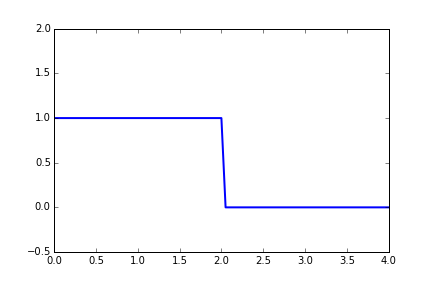
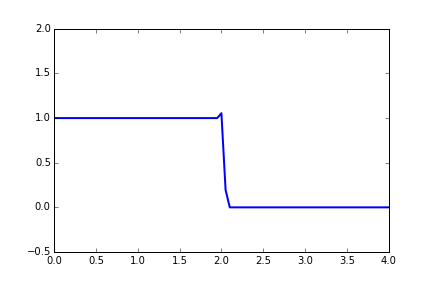
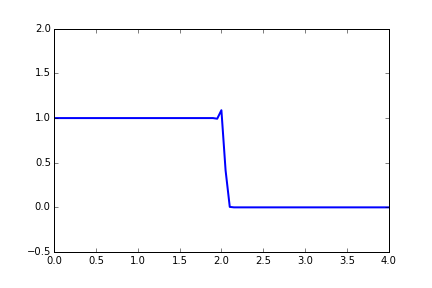
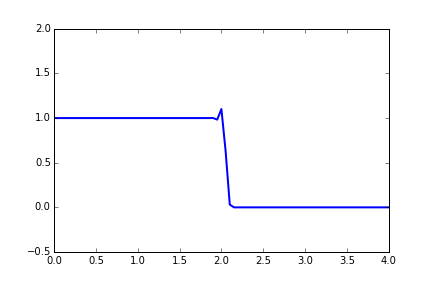
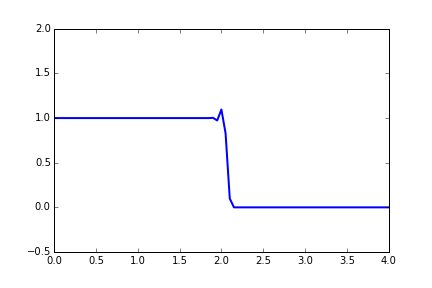
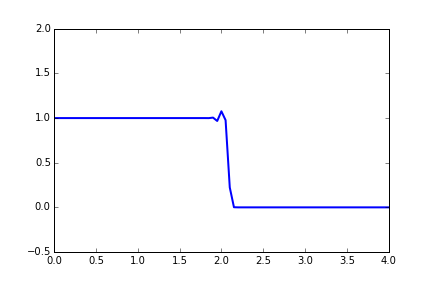
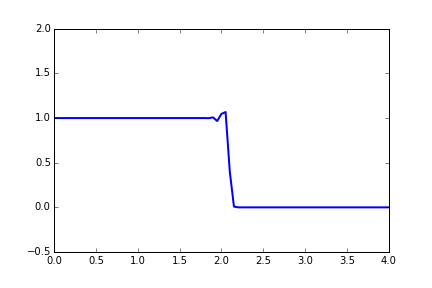
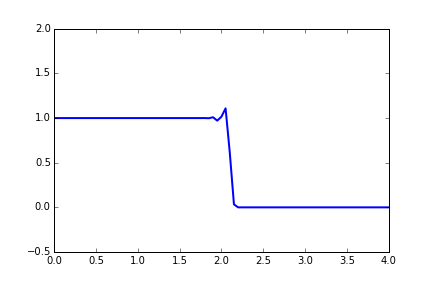
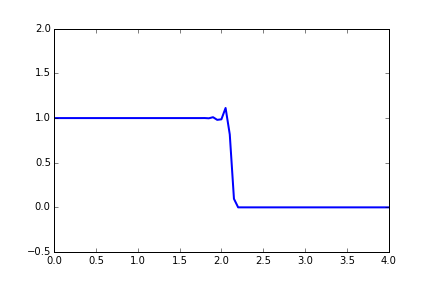
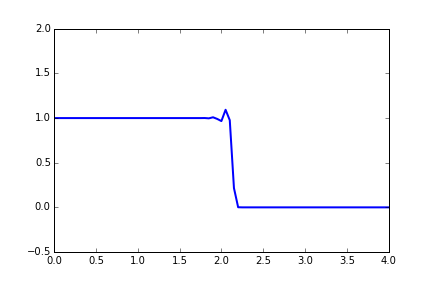
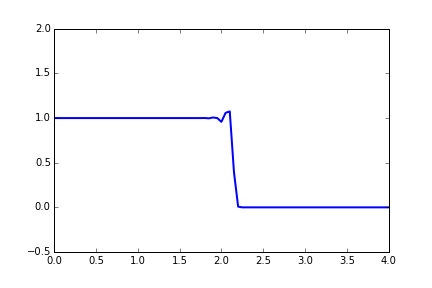
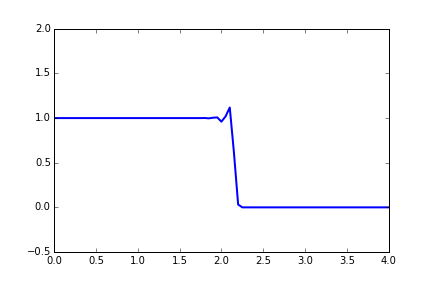
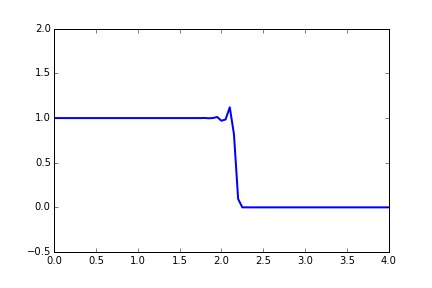
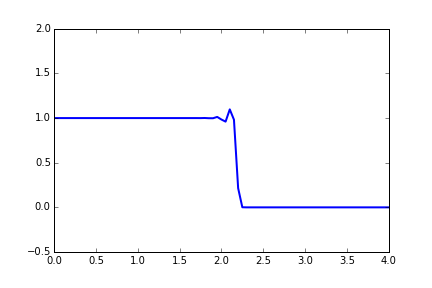
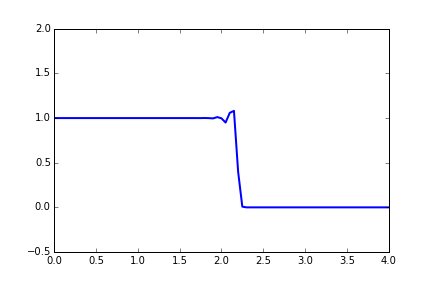
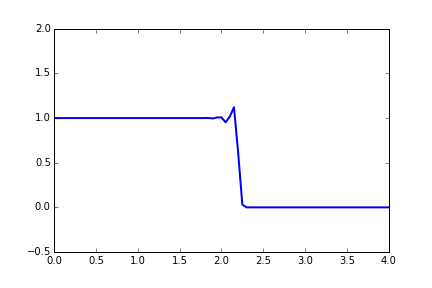
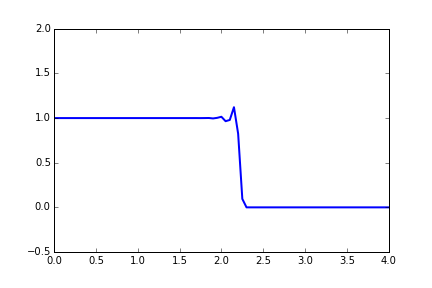
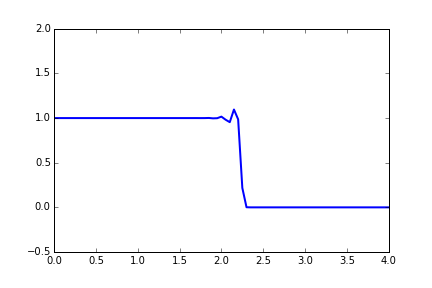
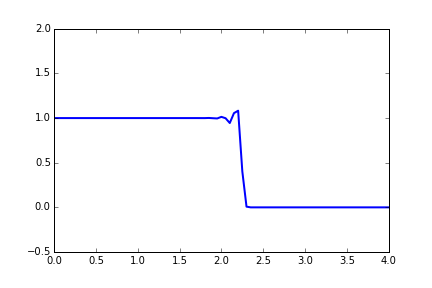
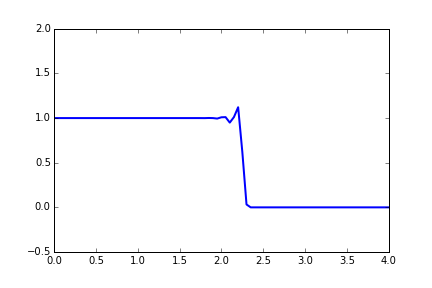
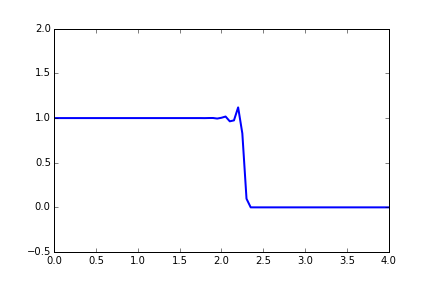
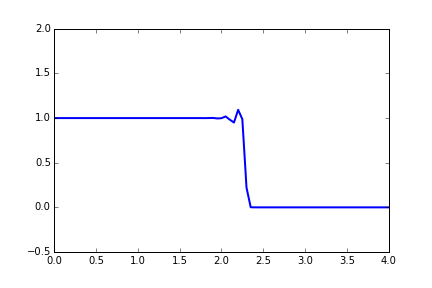
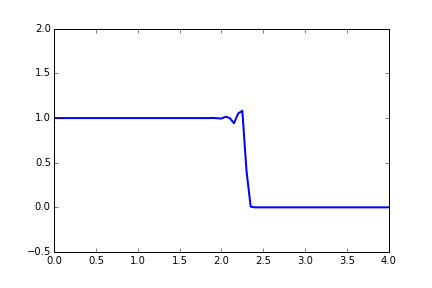
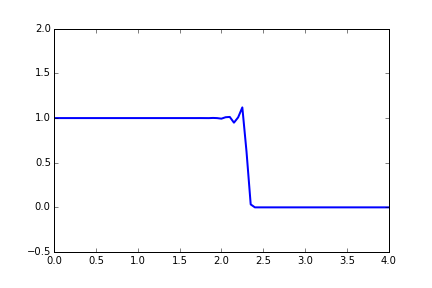
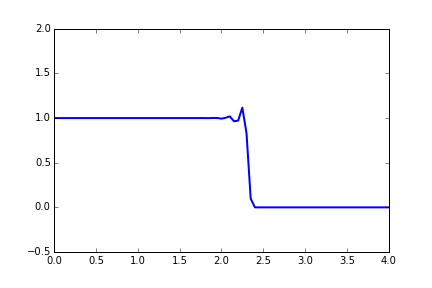
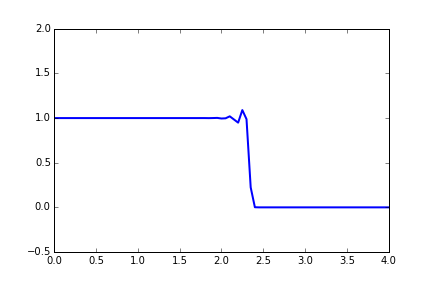
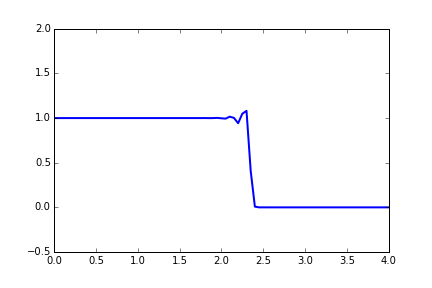
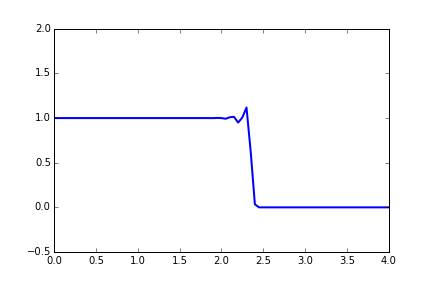
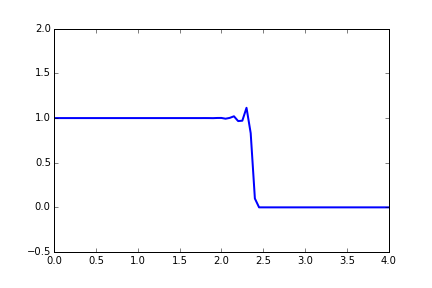
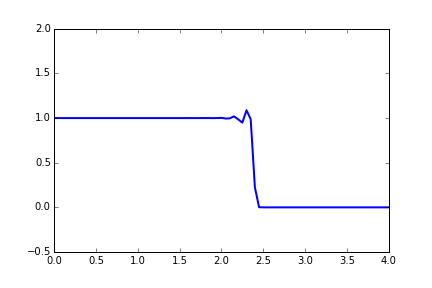
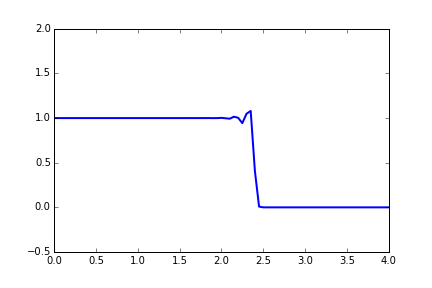
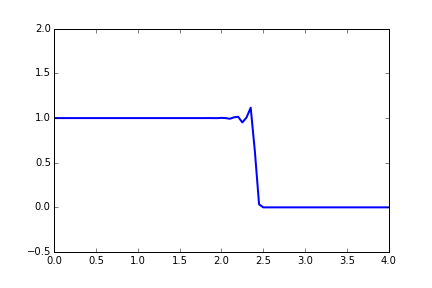
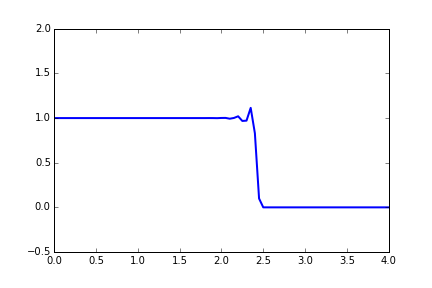
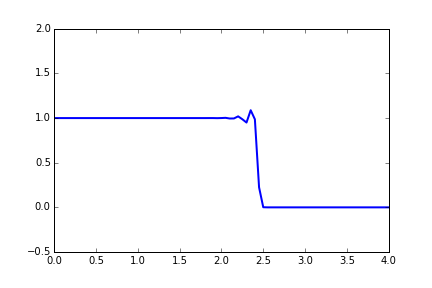
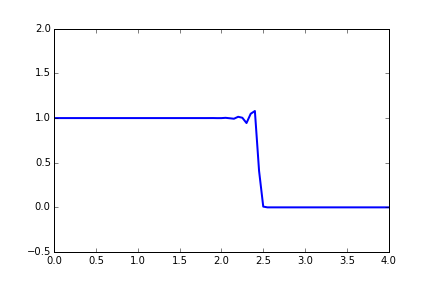
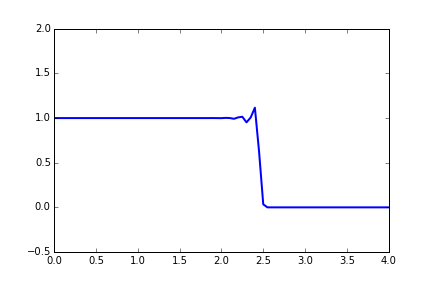
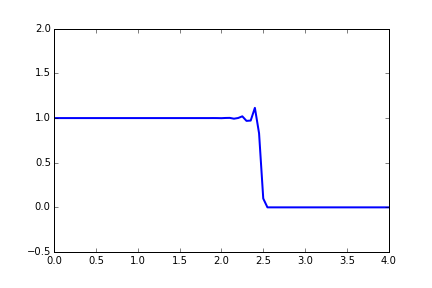
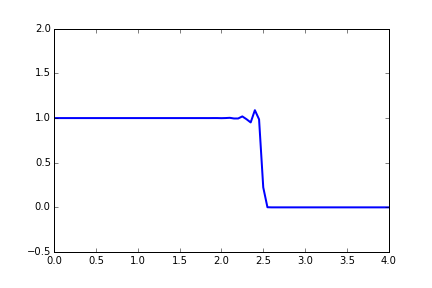
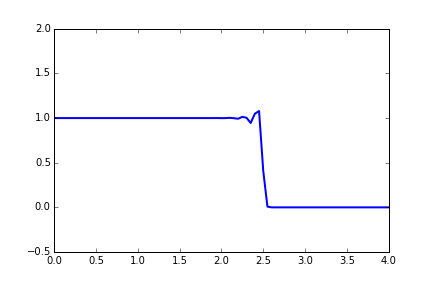
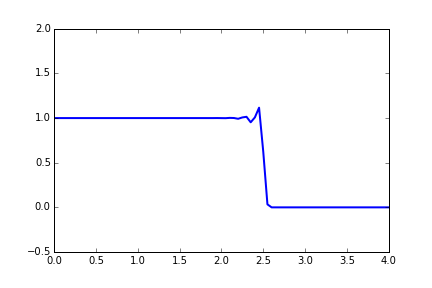
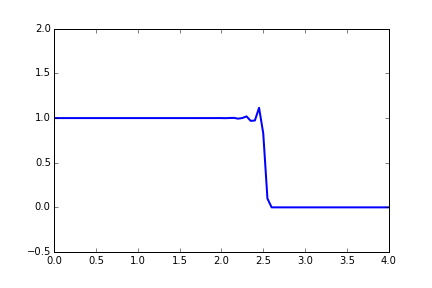
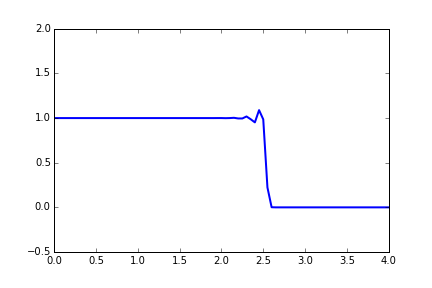
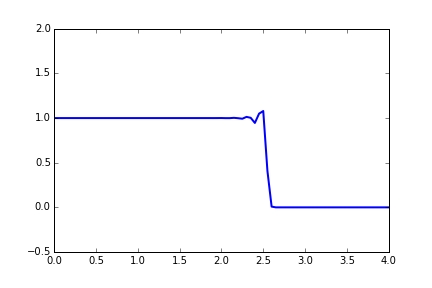
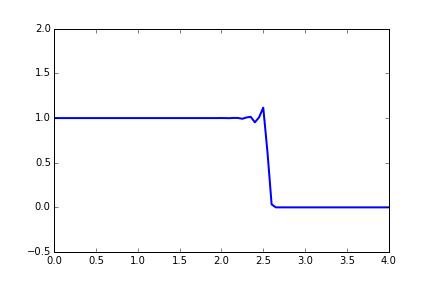
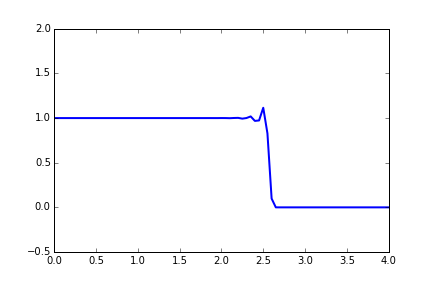
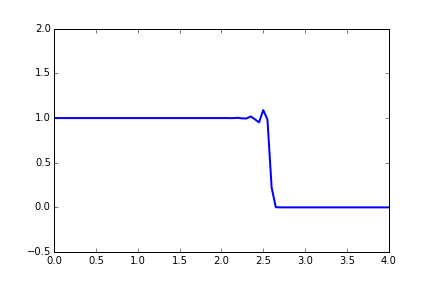
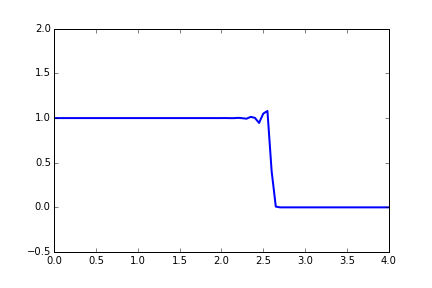
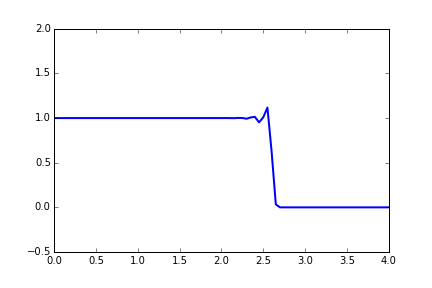
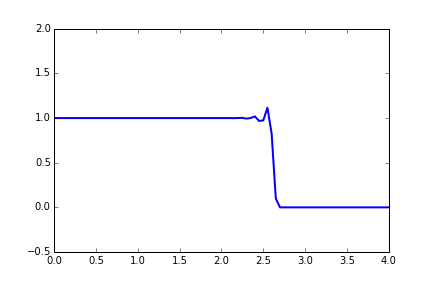
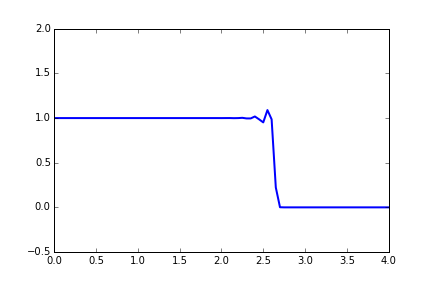
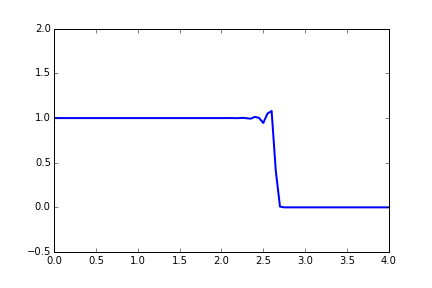
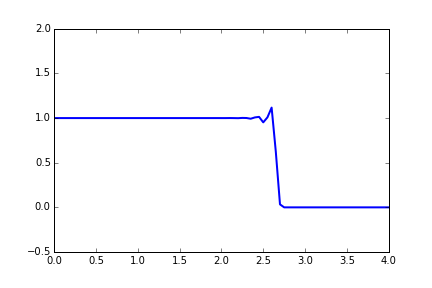
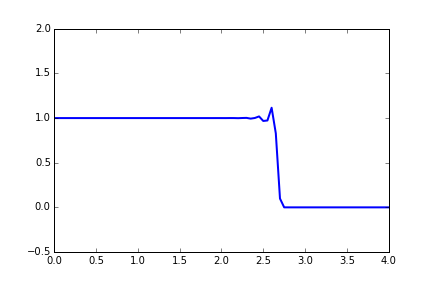
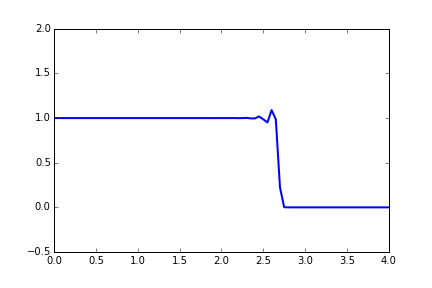
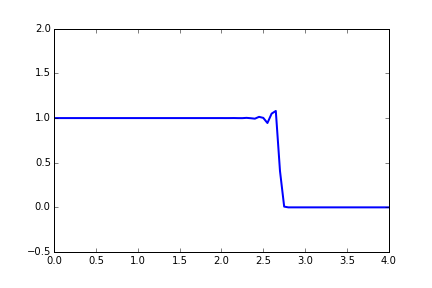
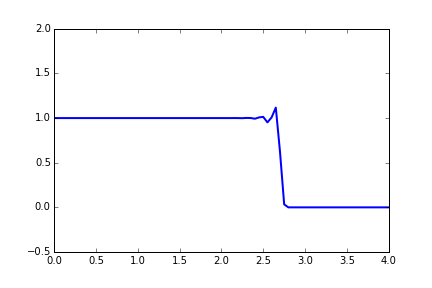
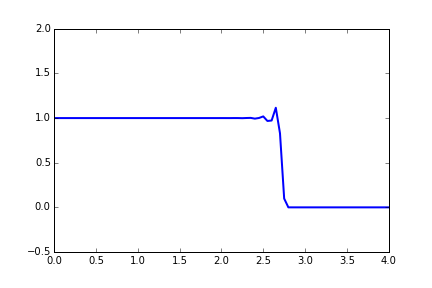
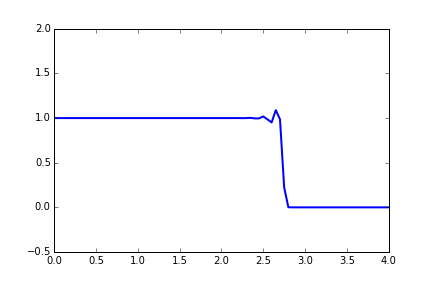
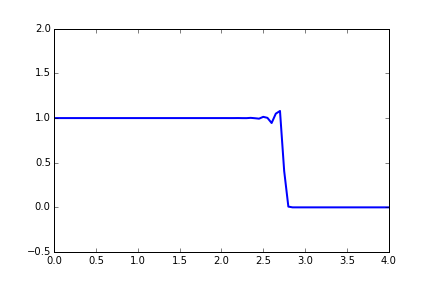
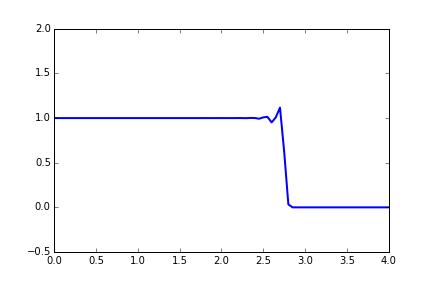
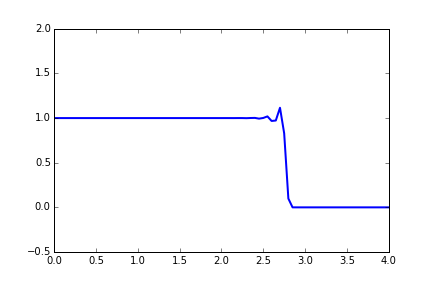
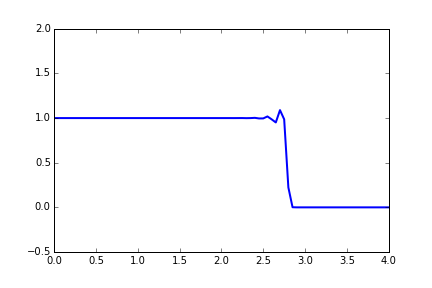
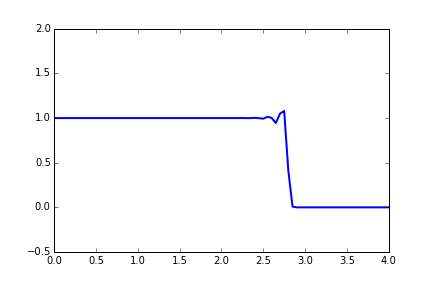
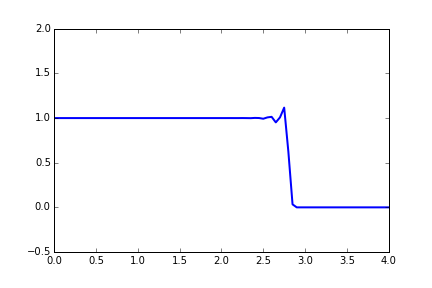
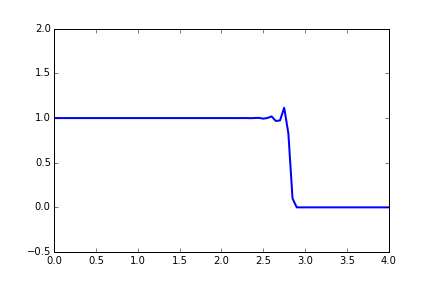
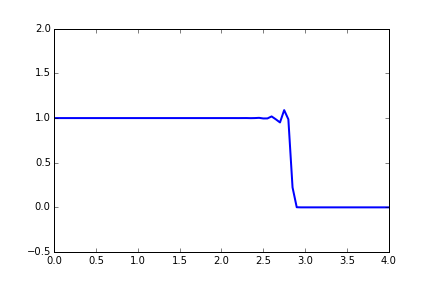
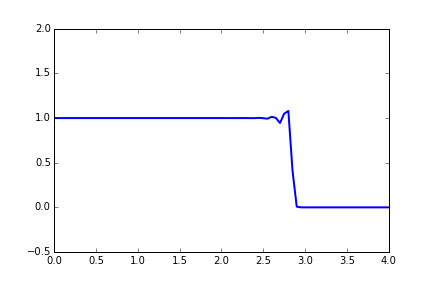
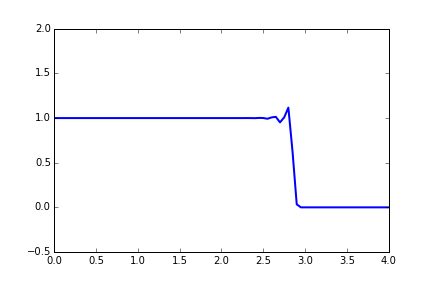
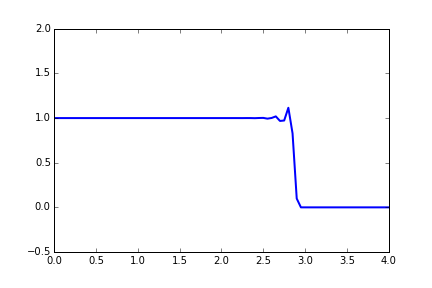
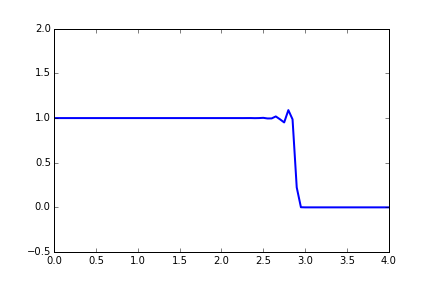

In [8]:
u = u_init(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u, nt, dt, dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4), ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

In [11]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

def maccormack2(u, nt, dt, dx):
    un = numpy.zeros((nt, len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    eps = 0.4
    
    for n in range(1, nt):
        F = computeF(u)
        ustar[1:-1] = u[1:-1] - dt/dx*(F[2:] - F[1:-1]) + eps*(u[2:] - 2*u[1:-1] + u[:-2])
        Fstar = computeF(ustar)
        un[n,1:] = 0.5*(u[1:] + ustar[1:] - dt/dx*(Fstar[1:] - Fstar[:-1]))
        u = un[n].copy()
        
    return un

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



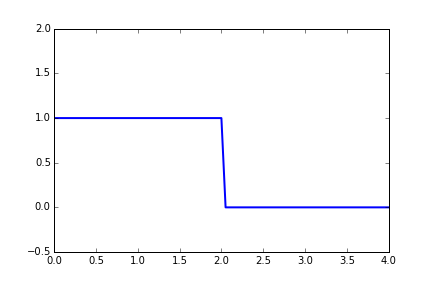
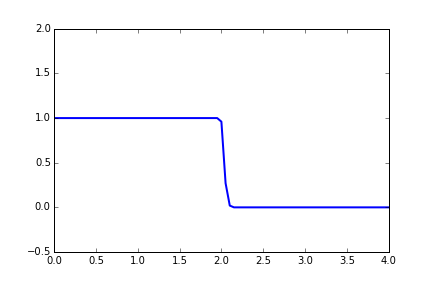
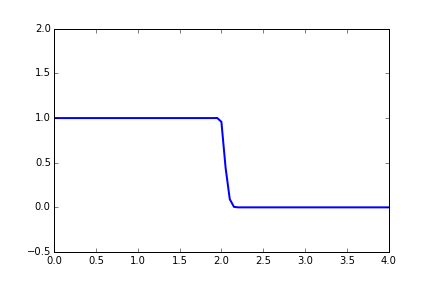
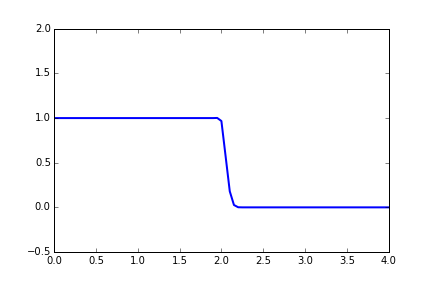
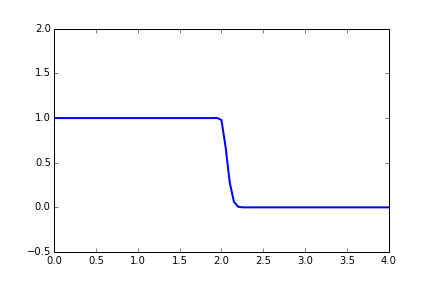
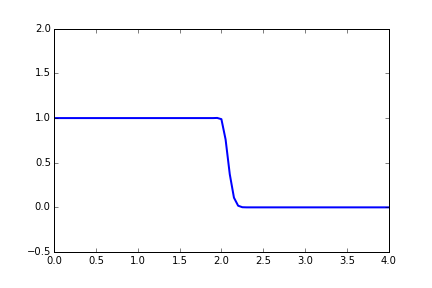
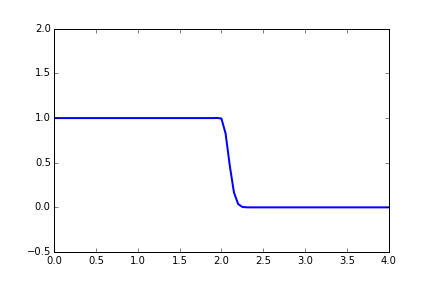
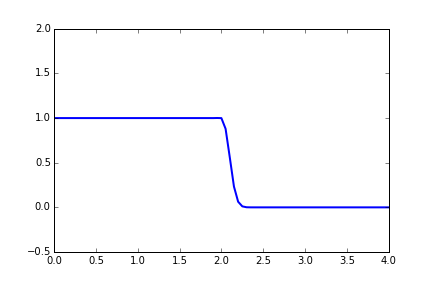
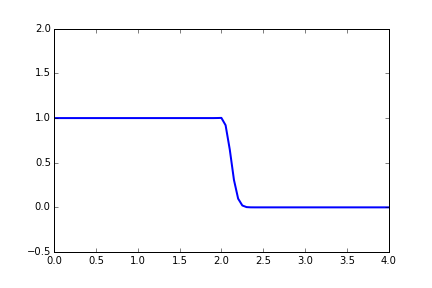
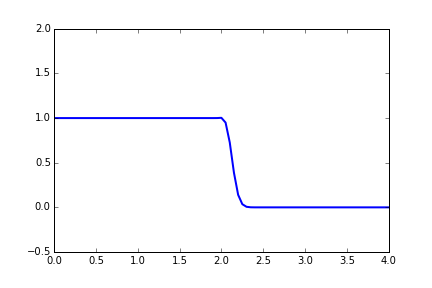
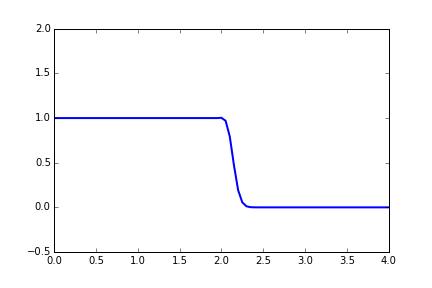
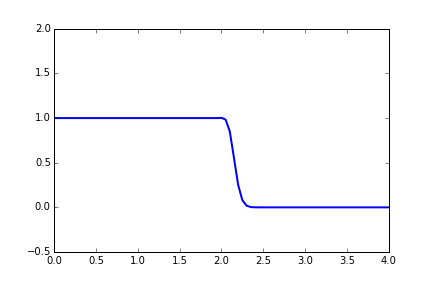
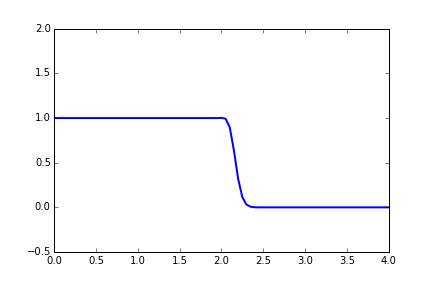
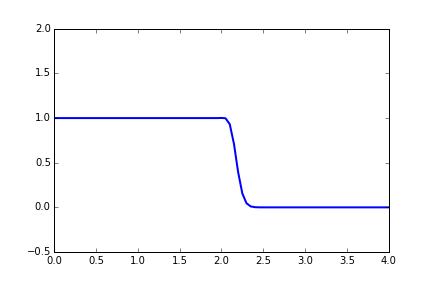
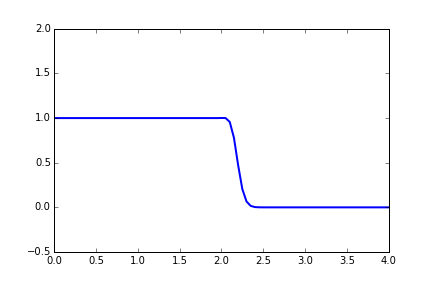
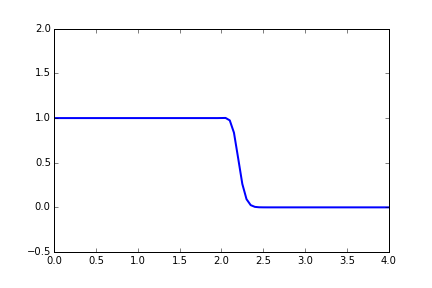
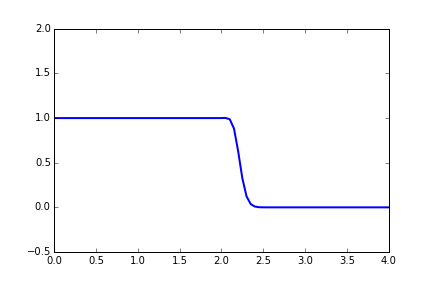
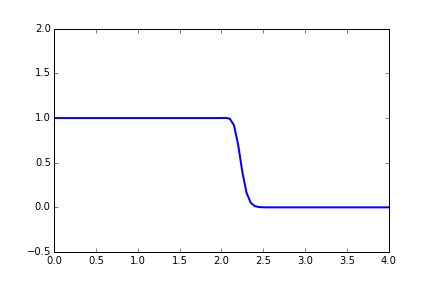
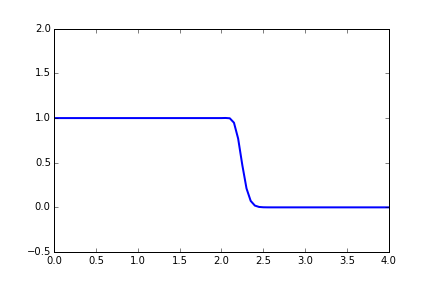
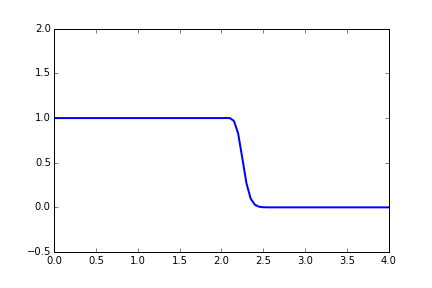
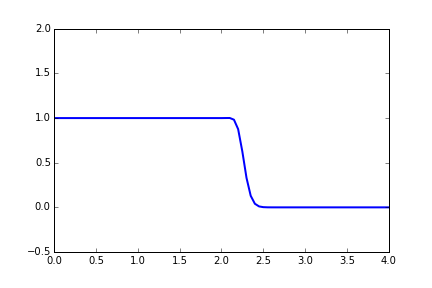
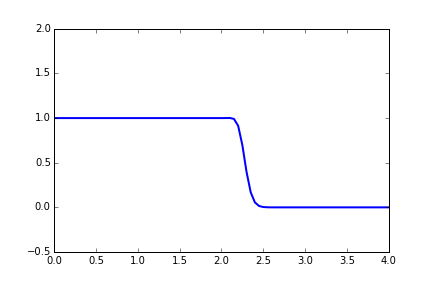
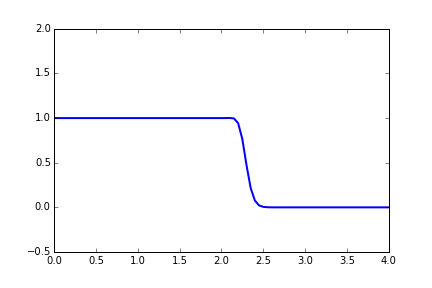
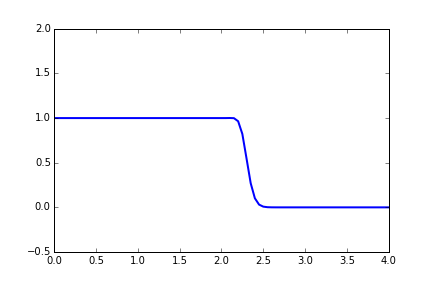
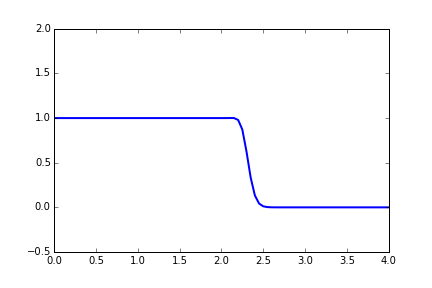
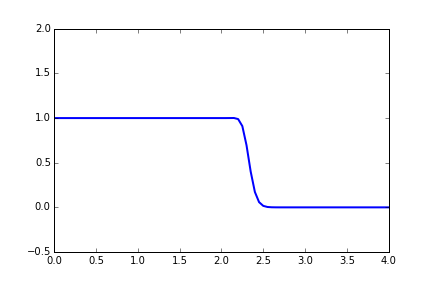
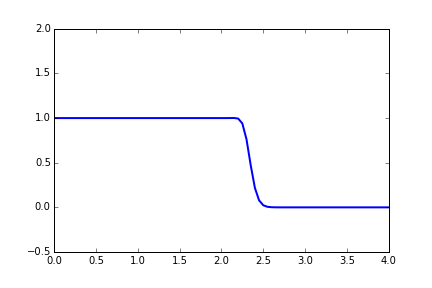
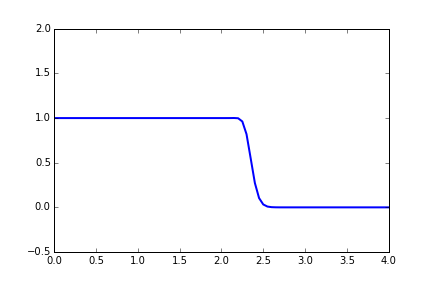
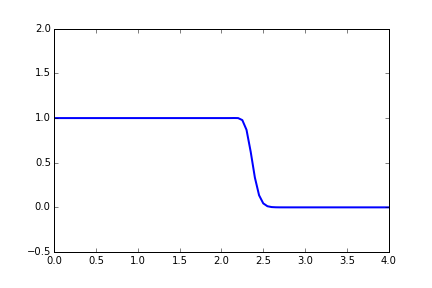
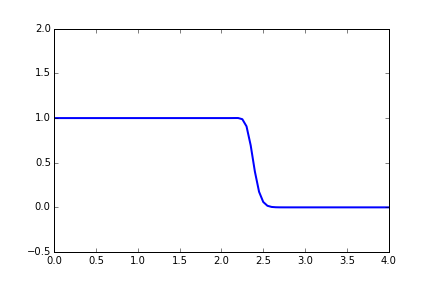
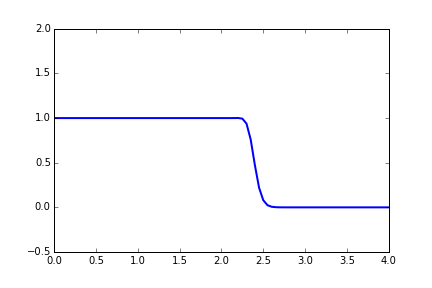
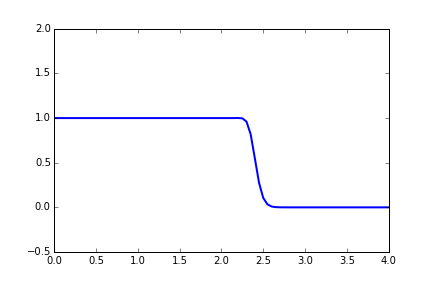
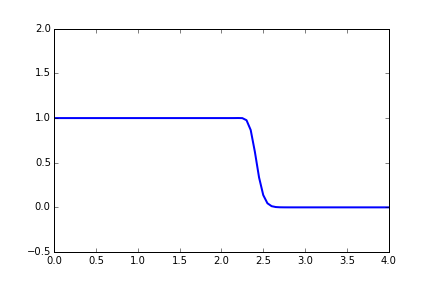
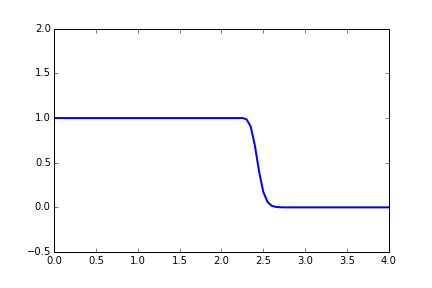
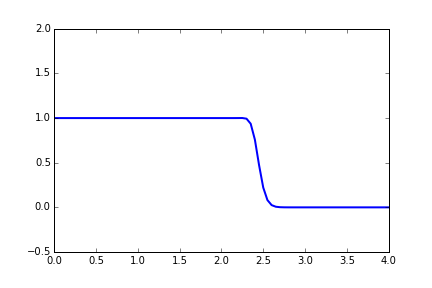
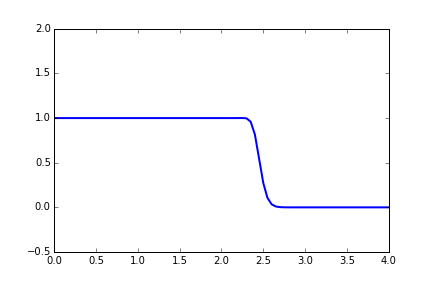
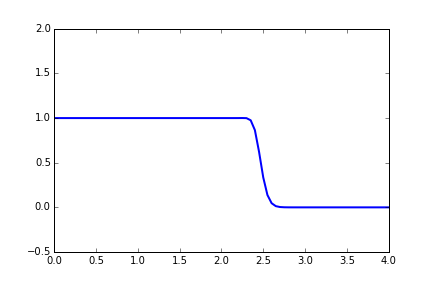
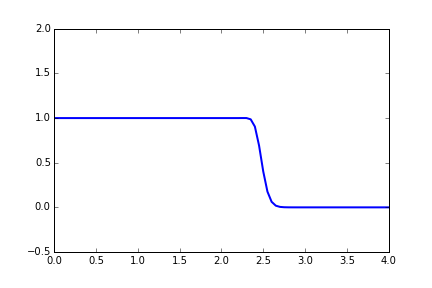
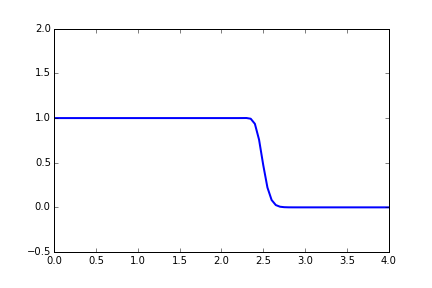
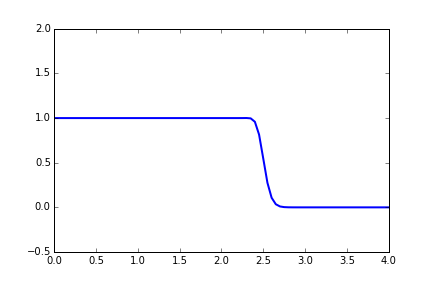
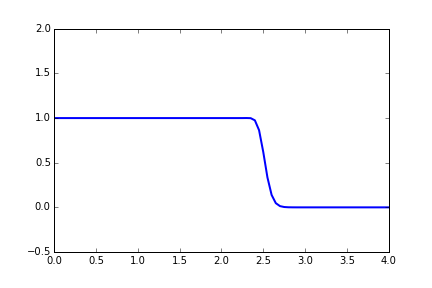
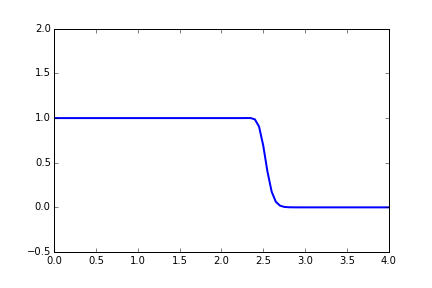
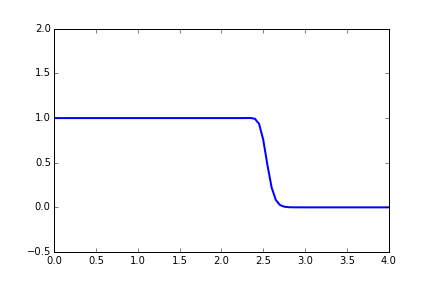
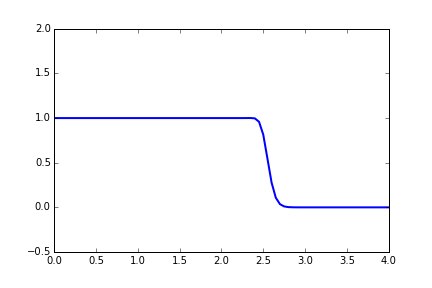
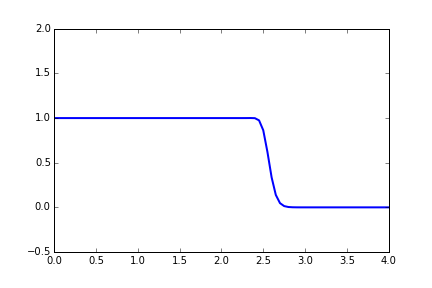
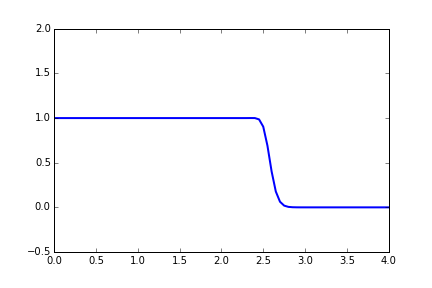
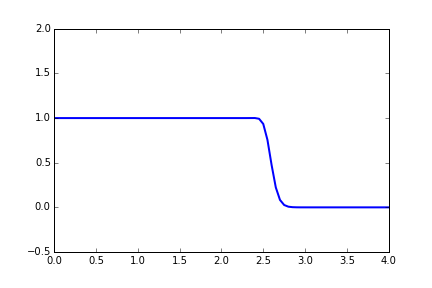
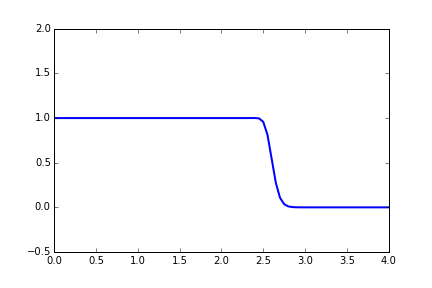
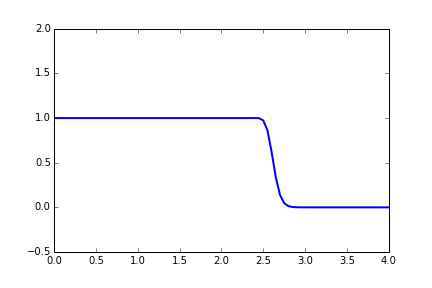
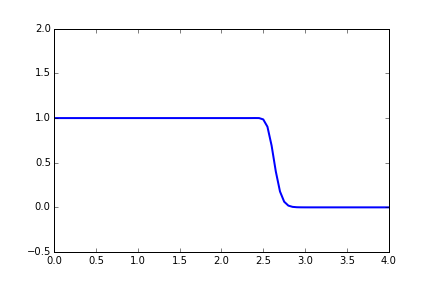
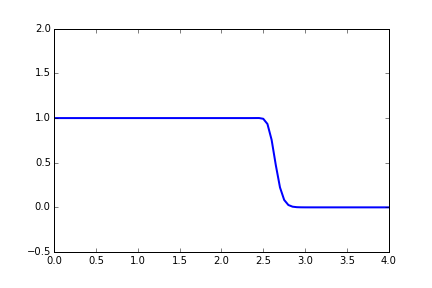
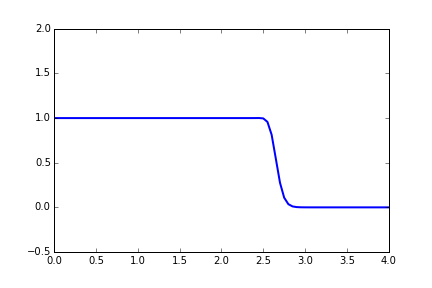
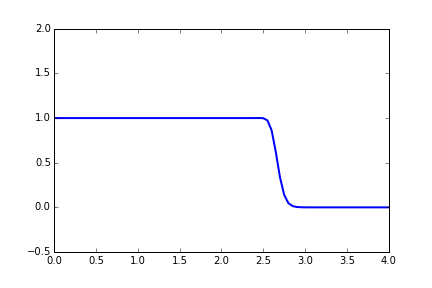
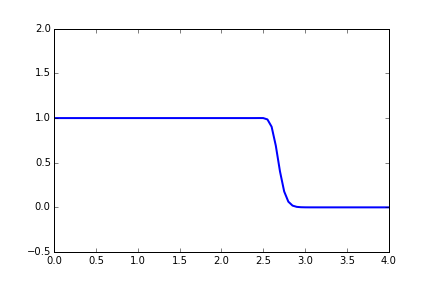
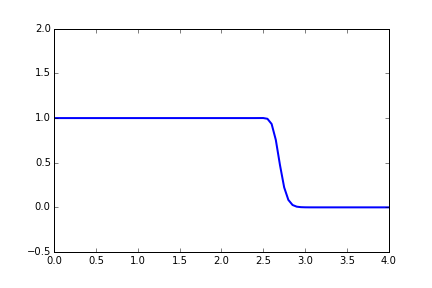
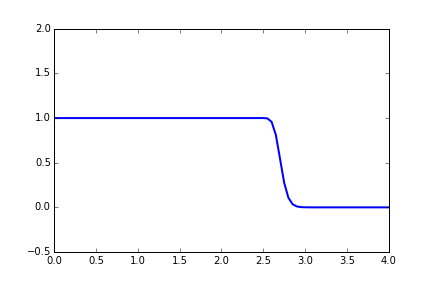
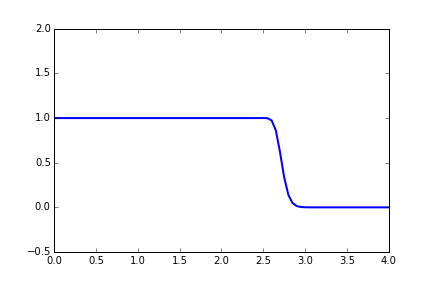
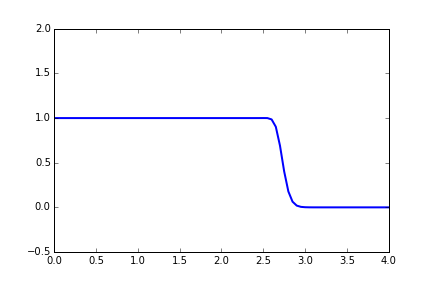
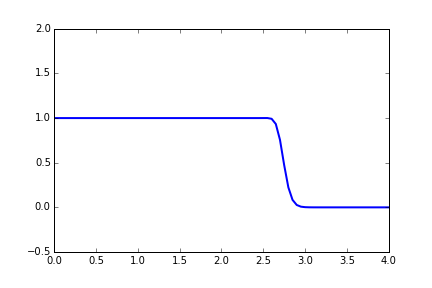
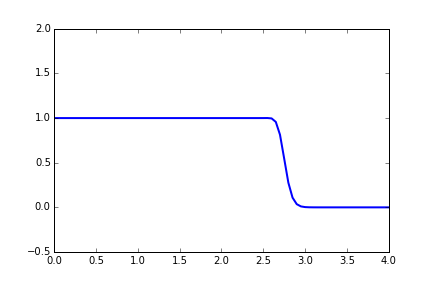
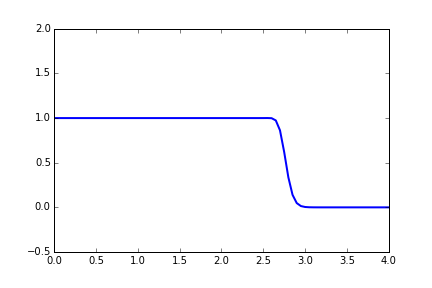
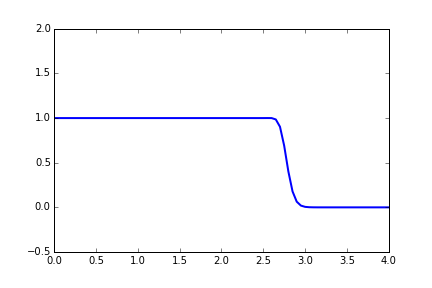
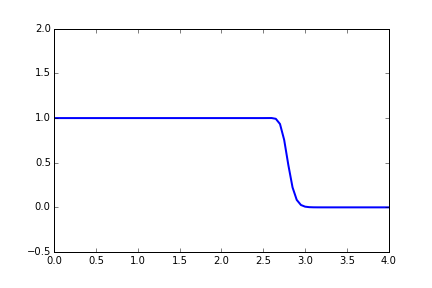
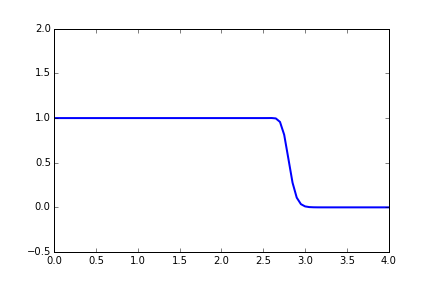
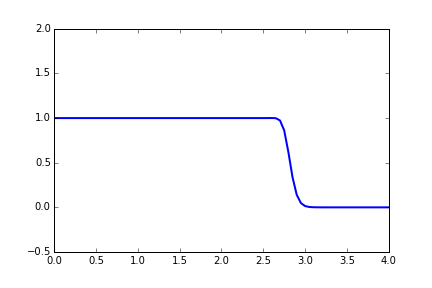
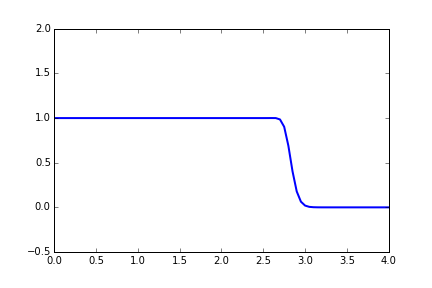
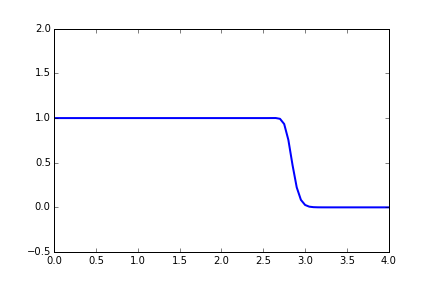
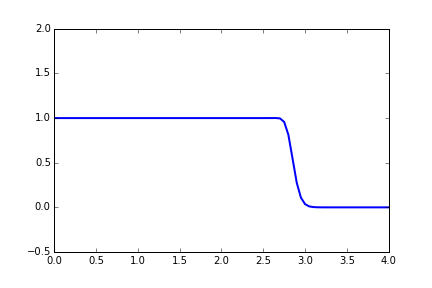
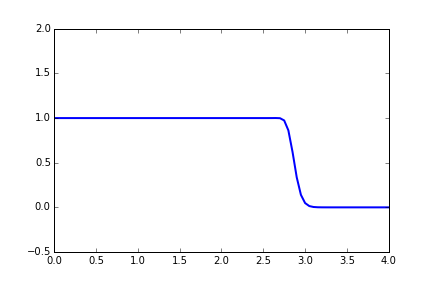
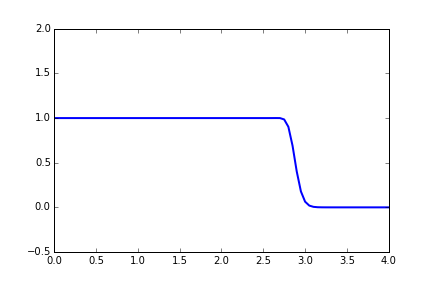

In [12]:
u = u_init(nx)
sigma = 1
dt = sigma*dx

un = maccormack2(u, nt, dt, dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4), ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

In [ ]:
nt = 11
nx = 11
u = u_init(nx)
un = numpy.zeros((nt, len(u)))
print(un)
